### This notebook classifies the samples based on their spectral peaks.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

A function for examining model metrics

In [2]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Show the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)


Read in the dataset.

In [3]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [4]:
df = pd.read_csv("../../data/scaled_and_noise_removal.csv")

In [5]:
df.head()

,Unnamed: 0,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,0,201210-1-00,0,200.00000,201210-1,Normal,1.000000
1,1,201210-1-00,1,200.68336,201210-1,Normal,0.982870
2,2,201210-1-00,2,201.36674,201210-1,Normal,0.966481
3,3,201210-1-00,3,202.05011,201210-1,Normal,0.950833
4,4,201210-1-00,4,202.73349,201210-1,Normal,0.935925


In [6]:
sample = df[df['SpecID'] == "210526-3-04"]

<AxesSubplot: xlabel='WaveNumber', ylabel='Absorbance'>

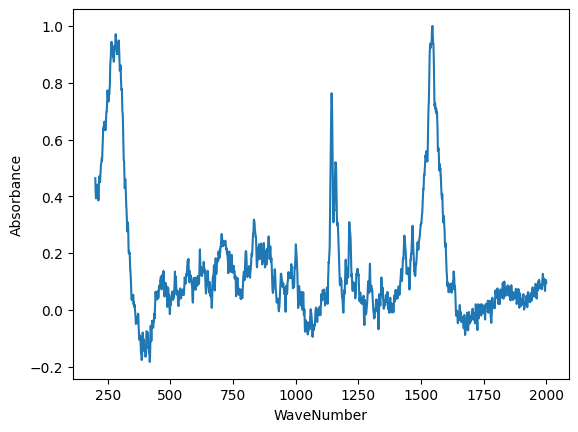

In [7]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [8]:
pivoted_df = df.pivot(index='SpecID', columns='WaveNumber', values='Absorbance').reset_index()
pivoted_df.columns.name = None

Add the statuses back.

In [9]:
statuses = df[['SpecID', 'Status']].drop_duplicates()
pivoted_df = pd.merge(pivoted_df, statuses, on='SpecID')
pivoted_df = pivoted_df.set_index('SpecID')

In [10]:
pivoted_df.head()

,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,...,1994.5331,1995.2164,1995.8998,1996.5831,1997.2665,1997.9498,1998.6333,1999.3167,2000.0,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,1.000000,0.982870,0.966481,0.950833,0.935925,0.927346,0.902431,0.889797,0.880243,0.864841,...,0.070690,0.082414,0.090970,0.092890,0.083230,0.082239,0.082605,0.084328,0.087409,Normal
201210-1-01,1.000000,0.980550,0.964007,0.950373,0.939647,0.930871,0.928574,0.925606,0.914910,0.900030,...,0.113337,0.117351,0.131463,0.146428,0.158236,0.161601,0.160516,0.154980,0.144994,Normal
201210-1-02,0.502527,0.491051,0.479540,0.467993,0.456410,0.450161,0.431959,0.424441,0.417415,0.408823,...,0.144569,0.141991,0.139207,0.144627,0.149526,0.150847,0.150600,0.148786,0.145404,Normal
201210-1-03,0.492251,0.418315,0.375666,0.364304,0.384230,0.461173,0.570848,0.577491,0.675831,0.807648,...,0.005644,0.007747,0.008992,0.010157,0.011991,0.011822,0.010642,0.008451,0.005248,Normal
201210-1-04,1.000000,0.994372,0.989487,0.985346,0.981948,0.976845,0.970762,0.977536,0.981513,0.963198,...,0.019359,0.028442,0.041845,0.058730,0.063852,0.070008,0.074530,0.077417,0.078669,Normal


##### PyCaret

In [11]:
import pandas as pd
from pycaret.classification import *

Set up the PyCaret environment

In [12]:
caret = setup(data=pivoted_df, target='Status', session_id=1234)

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2636)"
5,Transformed data shape,"(3045, 2636)"
6,Transformed train set shape,"(2131, 2636)"
7,Transformed test set shape,"(914, 2636)"
8,Numeric features,2635
9,Preprocess,True


Compare models

In [13]:
compare_models(exclude="gbc")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:53:37
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9019,0.9823,0.9019,0.9041,0.9021,0.8527,0.8536,0.3970
xgboost,Extreme Gradient Boosting,0.8925,0.9774,0.8925,0.8938,0.8925,0.8384,0.8391,31.3350
knn,K Neighbors Classifier,0.8649,0.9631,0.8649,0.8690,0.8650,0.7968,0.7985,0.2220
rf,Random Forest Classifier,0.8559,0.9695,0.8559,0.8578,0.8559,0.7836,0.7845,0.7810
lr,Logistic Regression,0.7283,0.8677,0.7283,0.7297,0.7276,0.5911,0.5921,4.6490
ada,Ada Boost Classifier,0.7044,0.8553,0.7044,0.7088,0.7039,0.5556,0.5576,3.4190
ridge,Ridge Classifier,0.6983,0.0000,0.6983,0.6998,0.6974,0.5458,0.5470,0.1720
svm,SVM - Linear Kernel,0.6945,0.0000,0.6945,0.7192,0.6869,0.5378,0.5523,0.6790
dt,Decision Tree Classifier,0.6898,0.7673,0.6898,0.6912,0.6895,0.5335,0.5342,0.7590
nb,Naive Bayes,0.5059,0.6840,0.5059,0.5605,0.5062,0.2685,0.2843,0.1440


KeyboardInterrupt: 

Create the model

In [14]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8879,0.9838,0.8879,0.8942,0.8884,0.8319,0.8344
1,0.9155,0.9865,0.9155,0.9166,0.9157,0.8731,0.8734
2,0.8826,0.9817,0.8826,0.8841,0.8828,0.8236,0.8241
3,0.9108,0.9760,0.9108,0.9154,0.9113,0.8662,0.8678
4,0.9014,0.9842,0.9014,0.9032,0.9014,0.8519,0.8527
5,0.9014,0.9807,0.9014,0.9010,0.9010,0.8517,0.8519
6,0.9390,0.9918,0.9390,0.9401,0.9391,0.9084,0.9087
7,0.8967,0.9816,0.8967,0.8971,0.8967,0.8446,0.8448
8,0.8826,0.9743,0.8826,0.8844,0.8826,0.8238,0.8247


In [15]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8178,0.9609,0.8178,0.8228,0.8176,0.7264,0.7286
1,0.8545,0.9711,0.8545,0.8575,0.8541,0.7812,0.7830
2,0.8357,0.9652,0.8357,0.8422,0.8358,0.7523,0.7555
3,0.8779,0.9577,0.8779,0.8809,0.8783,0.8166,0.8176
4,0.8357,0.9658,0.8357,0.8390,0.8350,0.7525,0.7548
5,0.8638,0.9703,0.8638,0.8635,0.8637,0.7952,0.7952
6,0.8638,0.9733,0.8638,0.8683,0.8635,0.7948,0.7973
7,0.8826,0.9704,0.8826,0.8866,0.8830,0.8235,0.8251
8,0.8216,0.9611,0.8216,0.8255,0.8208,0.7314,0.7340


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [16]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…